# Домашнее задание №7 по курсу "Машинное обучение"

Прокопенко Тимофей

### Задача 1.


**Решение:**<br>
Для корректной работы тренировочного скрипта необходимо поместить рядом с ним файлы 'spambase.csv' и распакованную папку libsvm.

Результаты тренировки и теста будут записаны в json. Для удобства прикреплю их к заданию.
По результатам тренировки также было получено, что на кросс валидации лучшие параметры C: 8192, d: 3 дают минимальную ошибку min error: 5.942028985507247.

1. Для начала нужно построить график среднего значения ошибки на кросс-валидации плюс-минус стандартное отклонение как функцию от С.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

min_val_err = 5.942028985507247
best_C = 8192
best_d = 3

In [58]:
with open(os.path.join('results', 'cv_results.json'), 'r') as f:
    data = json.load(f)
    
cv_dfs = [pd.DataFrame(d['res']) for d in data]

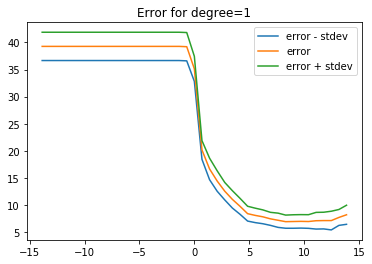

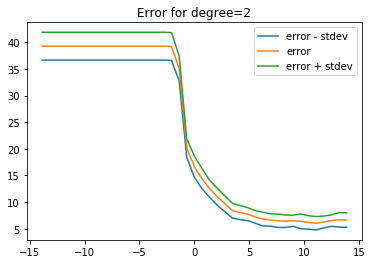

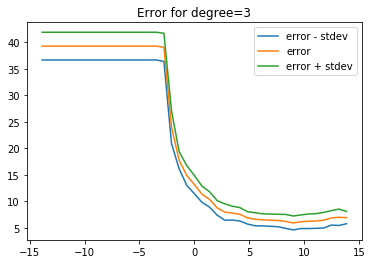

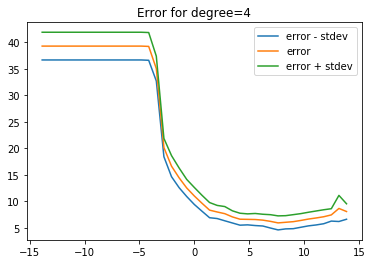

In [59]:
def plot_errors(errors, stdevs, costs, d):
    costs = np.log(costs)
    errors, stdevs = np.array(errors), np.array(stdevs)
    plt.plot(costs, errors - stdevs)
    plt.plot(costs, errors)
    plt.plot(costs, errors + stdevs)
    plt.title(f"Error for degree={d}")
    plt.legend(['error - stdev', 'error', 'error + stdev'], loc='upper right')
    plt.show()

for d in range(0, 4):
    cur_df = cv_dfs[d]
    plot_errors(cur_df['err'], cur_df['std'], cur_df['c'], d+1)

2. Построим графики ошибки на кросс-валидации и тестовой выборке как функцию от d.

Text(0.5, 1.0, 'cross-validation')

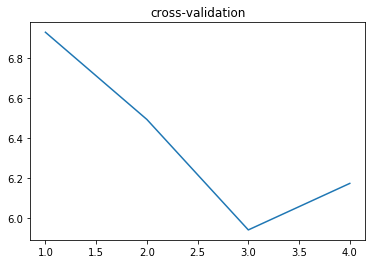

In [60]:
best_C_errors = []
for i, df in enumerate(cv_dfs):
    best_C_row = df.loc[df['c'] == best_C]
    best_C_errors.append(best_C_row['err'].values[0])

plt.plot(range(1, 5), best_C_errors)
plt.title('cross-validation')

      c  d       err  n_sv
0  8192  1  8.253692   703
1  8192  2  7.558645   661
2  8192  3  6.776716   619
3  8192  4  6.689835   599


Text(0.5, 1.0, 'test')

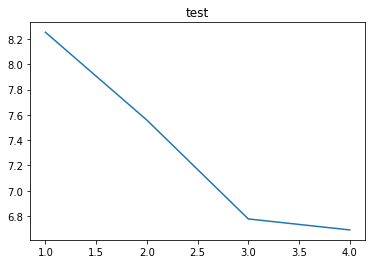

In [61]:
with open(os.path.join('results', 'test_results.json'), 'r') as f:
    test_data = json.load(f)
    
test_df = pd.DataFrame(test_data)
print(test_df)

plt.plot(test_df['d'], test_df['err'])
plt.title("test")

И график количества векторов как функции от d:

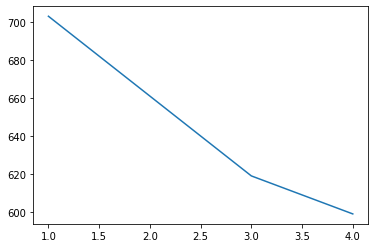

In [62]:
plt.plot(test_df['d'], test_df['n_sv'])

In [52]:
print(test_df.loc[test_df['d'] == best_d]['n_sv'].values[0])

619


#### Как много опорных векторов в вашем решении? Какие выводы вы можете сделать?
В моем решении при выбранных оптимальных параметрах получилось 619 опорных векторов, что составляет примерно 1/5 часть от всей тренировочной выборки (3450).
Таким образом, можно сделать вывод, что разделяющая полоса получилась довольно широкой, так как все опорные векторы попадают в нее.